<a href="https://colab.research.google.com/github/Giocatory/ml_ai_learning/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

x_train_org, y_train_org – изображения для обучения нейронной сети;

x_test_org, y_test_org – изображения для тестирования нейронной сети.

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Вывод формы данных для обучения
print(x_train_org.shape)
print(y_train_org.shape)
print(x_test_org.shape)
print(y_test_org.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)
2


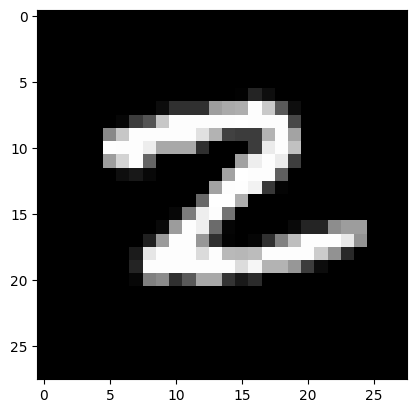

In [17]:
# Убедитесь, что ваши данные действительно представляют собой картинки с числами.
example_x_train = x_train_org[143]
print(example_x_train.shape)
print(y_train_org[143])

plt.imshow(example_x_train, cmap='gray')
plt.show()

In [18]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [19]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [20]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

In [21]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [22]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [23]:
# Вывод примера одного выходного вектора
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [26]:
# Вывод метки, соответствующей 36-му элементу
print(y_train_org[143])

2


Создание нейронной сети

In [27]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu', name='Dense_800'))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu', name='Dense_400'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax', name='Dense_10'))

In [28]:
model.layers

In [29]:
for layer in model.layers:
    print(f'Layer: {layer.name}\nActivation: {layer.activation.__name__}', end='\n\n')

Layer: Dense_800
Activation: relu

Layer: Dense_400
Activation: relu

Layer: Dense_10
Activation: softmax



In [30]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_800 (Dense)           (None, 800)               628000    
                                                                 
 Dense_400 (Dense)           (None, 400)               320400    
                                                                 
 Dense_10 (Dense)            (None, 10)                4010      
                                                                 
Total params: 952410 (3.63 MB)
Trainable params: 952410 (3.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [31]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 [==============================] - 11s 22ms/step - loss: 0.2046 - accuracy: 0.9394
Epoch 2/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0748 - accuracy: 0.9765
Epoch 3/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0481 - accuracy: 0.9852
Epoch 4/15
469/469 [==============================] - 10s 22ms/step - loss: 0.0362 - accuracy: 0.9881
Epoch 5/15
469/469 [==============================] - 11s 23ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 6/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0225 - accuracy: 0.9927
Epoch 7/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0201 - accuracy: 0.9931
Epoch 8/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 9/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0137 - accuracy: 0.9955
Epoch 10/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0111

Распознавание рукописных цифр

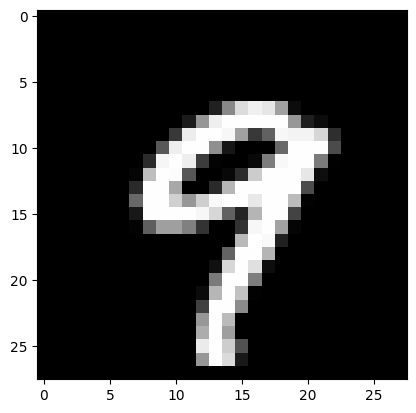

In [46]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [47]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(784,)
(1, 784)


In [48]:
# Распознавание примера
prediction = model.predict(x)

1/1 [==============================] - 0s 37ms/step


In [49]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[1.4234927e-18 5.6513313e-16 2.2151094e-18 3.4544383e-12 1.7997591e-10
  2.4591070e-17 2.3677129e-20 9.0440193e-13 7.0168459e-13 1.0000000e+00]]


In [50]:
sum(prediction[0])

1.000000000185037

In [51]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 9


In [52]:
# Вывод правильного ответа для сравнения
print(y_test_org[n_rec])

9


In [53]:
model.save('MNIST-Derkunov.keras')